# 51 Assigning physical properties to GemPy lith blocks

The lith block of a GemPy model returns the spatial distribution of layers in the subsurface. Assuming homogeneous layers and no change in properties with depth, physical properties can easily be assigned to these lithologies. These could include seismic velocities and densities or thermal conductivities to provide a first estimate of temperatures at depth. 

<img src="../images/tutorial51_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/51_assigning_physical_properties_to_lith_block/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="51_assigning_physical_properties_to_lith_block.zip", dirpath=file_path)

## Loading the lith block

The lith block of a computed GemPy model is loaded using NumPy and reshaped to the original dimensions (resolution) of the model.

In [2]:
import pyvista as pv
import numpy as np

lith_block = np.load(file_path + 'lith_block.npy').reshape(50,50,50)
lith_block[0]

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [3., 3., 3., ..., 2., 2., 1.],
       [3., 3., 3., ..., 2., 2., 2.],
       [3., 3., 3., ..., 2., 2., 2.]])

Unique values of the array. Values are rounded.

In [3]:
np.unique(np.round(lith_block))

array([1., 2., 3.])

Plotting the original lith_block.

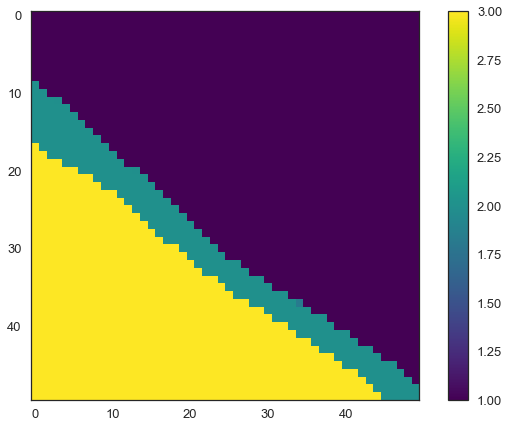

In [4]:
import matplotlib.pyplot as plt
im = plt.imshow(lith_block[1,:,:], cmap='viridis')
plt.colorbar(im);

## Assigning density values by ID

Sample values are stored as list and will then be converted to to a dictionary.

In [5]:
density_values = [0.1, 2.5, 1,5]

density_dict = {k: v for k,v in zip(np.unique(np.round(lith_block)), density_values)}
density_dict

{1.0: 0.1, 2.0: 2.5, 3.0: 1}

The density block will then be calculated.

In [6]:
density_block = gg.utils.assign_properties(lith_block=lith_block, property_dict=density_dict)
density_block[0]

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [1. , 1. , 1. , ..., 2.5, 2.5, 0.1],
       [1. , 1. , 1. , ..., 2.5, 2.5, 2.5],
       [1. , 1. , 1. , ..., 2.5, 2.5, 2.5]])

The data can be plotted using matplotlib.

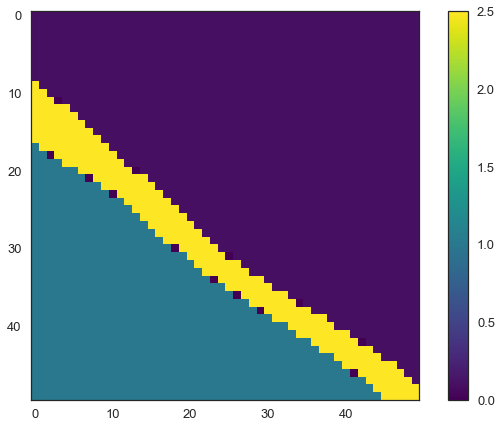

In [7]:
import matplotlib.pyplot as plt

im = plt.imshow(density_block[1,:,:], cmap='viridis')
plt.colorbar(im);

## Assigning seismic velocities by ID

Sample values are stored as a list and will then be converted to to a dictionary.

In [8]:
velocity_values = [300,2500,2000]

velocity_dict = {k: v for k,v in zip(np.unique(np.round(lith_block)), velocity_values)}
velocity_dict

{1.0: 300, 2.0: 2500, 3.0: 2000}

The velocity block will then be calculated.

In [9]:
velocity_block = gg.utils.assign_properties(lith_block=lith_block, property_dict=velocity_dict)
velocity_block[0]

array([[ 300,  300,  300, ...,  300,  300,  300],
       [ 300,  300,  300, ...,  300,  300,  300],
       [ 300,  300,  300, ...,  300,  300,  300],
       ...,
       [2000, 2000, 2000, ..., 2500, 2500,  300],
       [2000, 2000, 2000, ..., 2500, 2500, 2500],
       [2000, 2000, 2000, ..., 2500, 2500, 2500]])

The data can be plotted using matplotlib.

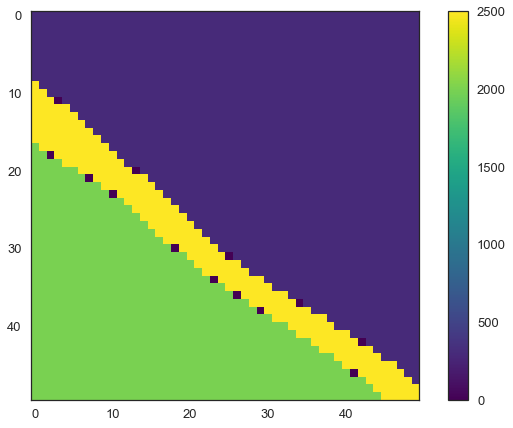

In [10]:
import matplotlib.pyplot as plt

im = plt.imshow(velocity_block[1,:,:], cmap='viridis')
plt.colorbar(im);

## Calculating acoustic impedance

The acoustic impedance is defined as the product of density and seismic velocity.

$$Z_p = \rho_p*V_p$$

In [11]:
impendance_block = density_block*velocity_block
impendance_block[0]

array([[  30.,   30.,   30., ...,   30.,   30.,   30.],
       [  30.,   30.,   30., ...,   30.,   30.,   30.],
       [  30.,   30.,   30., ...,   30.,   30.,   30.],
       ...,
       [2000., 2000., 2000., ..., 6250., 6250.,   30.],
       [2000., 2000., 2000., ..., 6250., 6250., 6250.],
       [2000., 2000., 2000., ..., 6250., 6250., 6250.]])

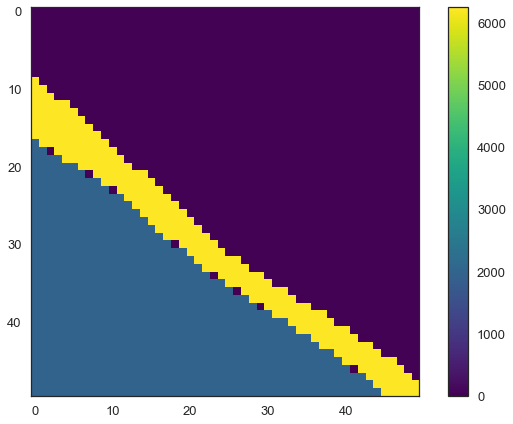

In [12]:
import matplotlib.pyplot as plt

im = plt.imshow(impendance_block[1,:,:], cmap='viridis')
plt.colorbar(im);

## Calculating the reflection coefficient

The vertical reflection coefficient is calculated as the difference between two impedance values divided by the sum of the two.

$$R_i = \frac{Z_1-Z_2}{Z_1+Z_2}$$

In [13]:
reflection_coeff = (impendance_block[:,1:] - impendance_block[:,:-1])/(impendance_block[:,1:] + impendance_block[:,:-1])
reflection_coeff[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99044586,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99044586],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

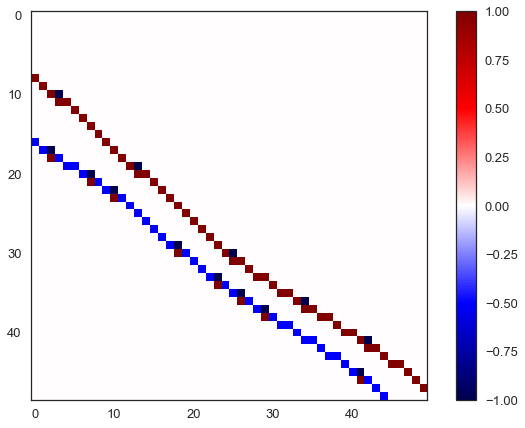

In [14]:
import matplotlib.pyplot as plt

im = plt.imshow(reflection_coeff[1,:,:], cmap='seismic')
plt.colorbar(im);

Replacing zero-values with ``np.nan``

In [15]:
reflection_coeff[reflection_coeff == 0] = np.nan
reflection_coeff[:0]

array([], shape=(0, 49, 50), dtype=float64)

Wrapping the array. 

In [16]:
volume = pv.wrap(reflection_coeff)
volume

UniformGrid (0x24d5b456820)
  N Cells:	115248
  N Points:	122500
  X Bounds:	0.000e+00, 4.900e+01
  Y Bounds:	0.000e+00, 4.800e+01
  Z Bounds:	0.000e+00, 4.900e+01
  Dimensions:	50, 49, 50
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

Plotting the data with PyVista.

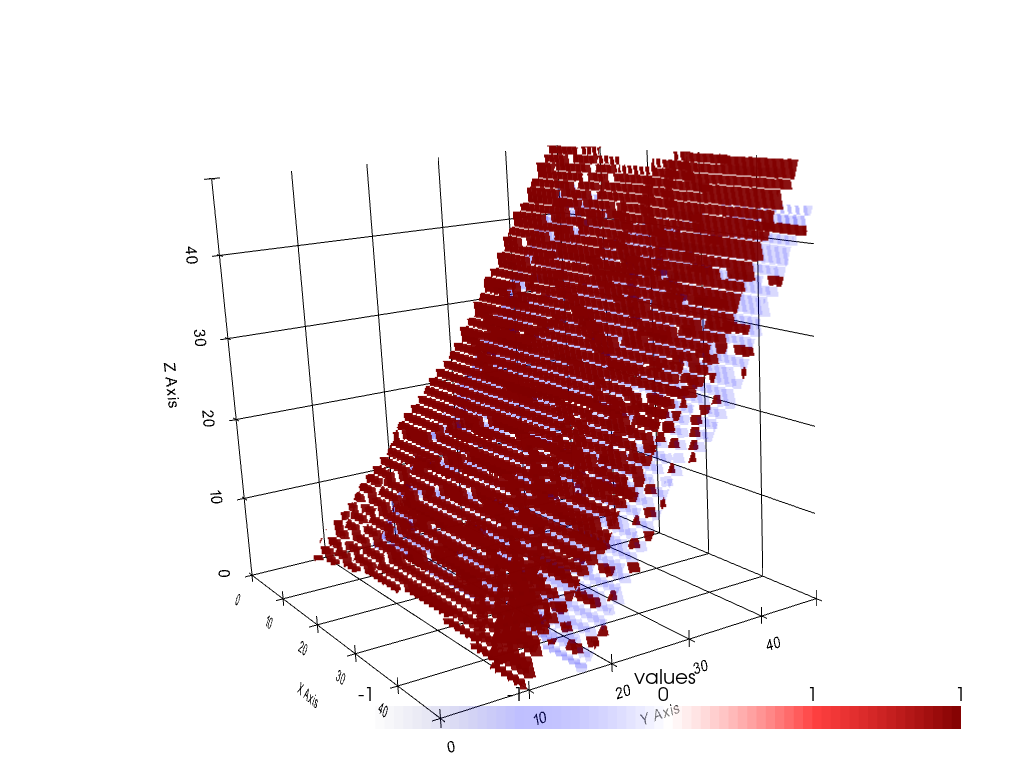

In [17]:
sargs = dict(fmt="%.0f", color='black')

p = pv.Plotter(notebook=True)
p.camera_position = [(161.91360339500804, -56.76742646880152, 61.85062200360107), (24.5, 24.5, 24.5), (-0.16718411386271567, 0.1641218812347994, 0.9721694709112653)]

p.add_volume(volume, scalar_bar_args=sargs, cmap='seismic')

p.show_grid(color='black')
p.set_background(color='white')
p.show()